In [ ]:
Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [32]:
# add the column(avg_rating,total_review_count,POI count) to yelp-df


import pandas as pd


dfs = pd.read_json('citybike_station.json')
city_bikes_df = dfs.copy()

yelp_df = pd.read_csv("C:/Users/Admin/yelp.csv")

yelp_df['avg_rating'] = yelp_df.groupby('station_name')['rating'].transform('mean')

yelp_df['total_review_count'] = yelp_df.groupby('station_name')['review count'].transform('sum')

yelp_df['num_restaurant'] = yelp_df.groupby('station_name')['station_name'].transform('count')

yelp_df


,rating,review count,latitude,longitude,station_name,avg_rating,total_review_count,num_restaurant
0,3.0,24,43.255179,-79.861443,Ferguson at King William,3.795238,5029,210
1,3.0,24,43.255179,-79.861443,Ferguson at King William,3.795238,5029,210
2,3.5,8,43.255179,-79.861443,Ferguson at King William,3.795238,5029,210
3,3.0,24,43.255179,-79.861443,Ferguson at King William,3.795238,5029,210
4,3.5,8,43.255179,-79.861443,Ferguson at King William,3.795238,5029,210
...,...,...,...,...,...,...,...,...
5930,2.5,16,43.254813,-79.890907,Dundurn St S,3.200000,3000,45
5931,2.5,2,43.254813,-79.890907,Dundurn St S,3.200000,3000,45
5932,2.5,16,43.254813,-79.890907,Dundurn St S,3.200000,3000,45
5933,2.5,57,43.254813,-79.890907,Dundurn St S,3.200000,3000,45


In [35]:
yelp_df = yelp_df.drop_duplicates(subset=['latitude', 'longitude'])
yelp_df

,rating,review count,latitude,longitude,station_name,avg_rating,total_review_count,num_restaurant
0,3.0,24,43.255179,-79.861443,Ferguson at King William,3.795238,5029,210
210,3.5,10,43.261886,-79.877606,Queen at Peter,3.785714,9183,210
420,2.5,16,43.266211,-79.899309,Longwood at Edgevale,3.100000,179,10
430,4.0,11,43.264715,-79.915746,Athletic Centre Bike Racks,3.809524,374,21
451,3.5,17,43.262409,-79.887981,King at Dundurn,3.188889,558,45
...,...,...,...,...,...,...,...,...
5856,5.0,2,43.265581,-79.949656,Cootes at York and King,3.333333,139,15
5871,4.0,11,43.257254,-79.934226,Osler at Main,3.550000,144,10
5881,3.5,10,43.272362,-79.866271,Bay at Macaulay,3.333333,25,3
5884,4.0,5,43.251884,-79.846358,King at Sanford,3.916667,45,6


In [37]:
dfs = dfs.reset_index(drop=True)
merged_df = dfs.merge(yelp_df, on='station_name')

merged_df


,station_name,empty_slots,free_bikes,payment,latitude_x,longitude_x,timestamp,rating,review count,latitude_y,longitude_y,avg_rating,total_review_count,num_restaurant
0,Bayfront Park,12,19,"key, applepay, androidpay, transitcard, accoun...",43.269288,-79.871327,2023-06-05 03:11:15.807000+00:00,3.5,10,43.269288,-79.871327,3.633333,143,15
1,John at Main,0,15,"key, applepay, androidpay, transitcard, accoun...",43.254529,-79.867180,2023-06-05 03:11:15.985000+00:00,3.5,8,43.254529,-79.867180,3.835714,4830,210
2,Athletic Centre Bike Racks,5,14,"key, applepay, androidpay, transitcard, accoun...",43.264715,-79.915746,2023-06-05 03:11:16.093000+00:00,4.0,11,43.264715,-79.915746,3.809524,374,21
3,McMaster Mary Keyes,0,14,"key, applepay, androidpay, transitcard, accoun...",43.262460,-79.922247,2023-06-05 03:11:15.925000+00:00,4.0,11,43.262460,-79.922247,3.750000,159,10
4,Cootes at York and King,2,13,"key, applepay, androidpay, transitcard, accoun...",43.265581,-79.949656,2023-06-05 03:11:15.989000+00:00,5.0,2,43.265581,-79.949656,3.333333,139,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Cootes Drive Dundas,0,1,"key, applepay, androidpay, transitcard, accoun...",43.265474,-79.947660,2023-06-05 03:11:15.949000+00:00,5.0,2,43.265474,-79.947660,3.333333,139,15
87,Queen at Peter,11,1,"key, applepay, androidpay, transitcard, accoun...",43.261886,-79.877606,2023-06-05 03:11:15.860000+00:00,3.5,10,43.261886,-79.877606,3.785714,9183,210
88,Gage Park,22,1,"key, applepay, androidpay, transitcard, accoun...",43.243448,-79.830410,2023-06-05 03:11:16.045000+00:00,4.5,43,43.243448,-79.830410,4.333333,87,3
89,City Hall,15,1,"key, applepay, androidpay, transitcard, accoun...",43.256132,-79.874499,2023-06-05 03:11:15.830000+00:00,3.5,8,43.256132,-79.874499,3.788095,4114,210


In [40]:
eda_df = merged_df.copy()
eda_df.head(5)

,station_name,free_bikes,payment,latitude_x,longitude_x,rating,review count,avg_rating,total_review_count,num_restaurant
0,Bayfront Park,19,"key, applepay, androidpay, transitcard, accoun...",43.269288,-79.871327,3.5,10,3.633333,143,15
1,John at Main,15,"key, applepay, androidpay, transitcard, accoun...",43.254529,-79.867180,3.5,8,3.835714,4830,210
2,Athletic Centre Bike Racks,14,"key, applepay, androidpay, transitcard, accoun...",43.264715,-79.915746,4.0,11,3.809524,374,21
3,McMaster Mary Keyes,14,"key, applepay, androidpay, transitcard, accoun...",43.262460,-79.922247,4.0,11,3.750000,159,10
4,Cootes at York and King,13,"key, applepay, androidpay, transitcard, accoun...",43.265581,-79.949656,5.0,2,3.333333,139,15


In [ ]:
merged_df.drop(['payment','total_review_count','latitude_x','longitude_x','review count'],axis = 1, inplace = True)

In [43]:
merged_df.head(5)

,station_name,free_bikes,rating,avg_rating,num_restaurant
0,Bayfront Park,19,3.5,3.633333,15
1,John at Main,15,3.5,3.835714,210
2,Athletic Centre Bike Racks,14,4.0,3.809524,21
3,McMaster Mary Keyes,14,4.0,3.750000,10
4,Cootes at York and King,13,5.0,3.333333,15


In [ ]:
merged_df.drop('rating', axis=1, inplace=True)

In [54]:
merged_df

,station_name,free_bikes,avg_rating,num_restaurant
0,Bayfront Park,19,3.633333,15
1,John at Main,15,3.835714,210
2,Athletic Centre Bike Racks,14,3.809524,21
3,McMaster Mary Keyes,14,3.750000,10
4,Cootes at York and King,13,3.333333,15
...,...,...,...,...
86,Cootes Drive Dundas,1,3.333333,15
87,Queen at Peter,1,3.785714,210
88,Gage Park,1,4.333333,3
89,City Hall,1,3.788095,210


In [ ]:
#EDA:
    
# there are 132 bike sattions in hamilton.
  sdf.shape
# Access the "station_name" column
  sdf['statoin_name']
# Filter rows where 'empty_slots' is greater than 10
  filtered_df = df[df['empty_slots'] > 10] 
# Calculate the ratio of 'free_bikes' to 'empty_slots' and add it as a new column 'bike_ratio'
  filtered_df['bike_ratio'] = filtered_df['free_bikes'] / filtered_df['empty_slots']
# Group the DataFrame by 'station_name' and calculate the sum of 'total_review_count'
   grouped_df = filtered_df.groupby('station_name').agg({'total_review_count': 'sum'})

In [55]:
sdf = merged_df
sdf

,station_name,free_bikes,avg_rating,num_restaurant
0,Bayfront Park,19,3.633333,15
1,John at Main,15,3.835714,210
2,Athletic Centre Bike Racks,14,3.809524,21
3,McMaster Mary Keyes,14,3.750000,10
4,Cootes at York and King,13,3.333333,15
...,...,...,...,...
86,Cootes Drive Dundas,1,3.333333,15
87,Queen at Peter,1,3.785714,210
88,Gage Park,1,4.333333,3
89,City Hall,1,3.788095,210


In [56]:
# store the dataframe to JSON file
sdf.to_json('station2.json')


In [57]:
# store the dataframe to CSV file
sdf.to_csv('station2.csv')

In [ ]:
Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

In [58]:
import statsmodels.api as sm
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

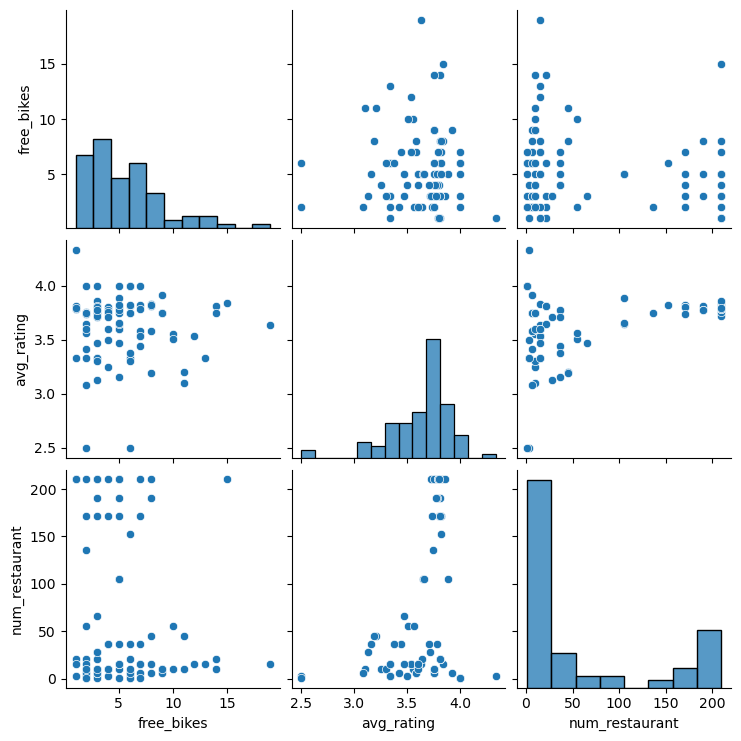

In [59]:
sns.pairplot(data = merged_df)
plt.show()

In [ ]:
Database

In [ ]:
Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [61]:
import sqlite3
import pandas as pd




# Create a connection to the SQLite database
conn = sqlite3.connect('C:/Users/Admin/sdf.db')

# Store your DataFrame in the SQLite database
sdf.to_sql('sdf', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()


In [66]:
import sqlite3
import pandas as pd




# Create a connection to the SQLite database
conn = sqlite3.connect('C:/Users/Admin/yelp_df.db')

# Store your DataFrame in the SQLite database
yelp_df.to_sql('yelp_df', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

In [67]:
import sqlite3
import pandas as pd




# Create a connection to the SQLite database
conn = sqlite3.connect('C:/Users/Admin/city_bikes_df.db')

# Store your DataFrame in the SQLite database
city_bikes_df.to_sql('city_bikes_df', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

In [ ]:
Look at the data before and after the join to validate your data.

In [ ]:
SELECT *
FROM yelp_df;

In [ ]:
SELECT *
FROM city_bikes_df;

In [ ]:
SELECT *
FROM yelp_df
JOIN city_bikes_df ON yelp_df.station_name = city_bikes_df.station_name;

In [ ]:
SELECT *
FROM sdf;

In [ ]:
SELECT COUNT(*) FROM sdf